<a href="https://colab.research.google.com/github/Jo-chana/CoLab_ML_codes/blob/master/ML_hardcoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [0]:
X = np.random.randn(200,1)
y = 1.5*X+ np.random.randn(200,1) + 3

In [0]:
# 정규방정식 

X_bias = np.c_[np.ones((200,1)),X] # bias 출력 추가
# bias 추가 함수
def bias(data):
  return np.c_[np.ones((len(data),1)),data]

theta_hat = np.linalg.inv(X_bias.T.dot(X_bias)).dot(X_bias.T).dot(y)

In [182]:
theta_hat

array([[3.09038329],
       [1.47594713]])

In [0]:
#데이터 그래프 함수
def graph(X,y,theta_hat,poly=0):
  plt.plot(X,y,'b.')
  X_new = np.linspace(min(X),max(X),len(X)).reshape(len(X),1)
  if poly:
    X_new_poly = poly_feature(X_new, poly)
  y_new = bias(X_new_poly).dot(theta_hat)
  plt.plot(X_new,y_new,'r-',label='predict')
  plt.xlabel('X',fontsize=12)
  plt.ylabel('y',fontsize=12)
  plt.legend(loc='upper left',fontsize=10)
  plt.axis([min(X),max(X),min(y),max(y)])
  plt.show()

In [0]:
y_predict = X_bias.dot(theta_hat)

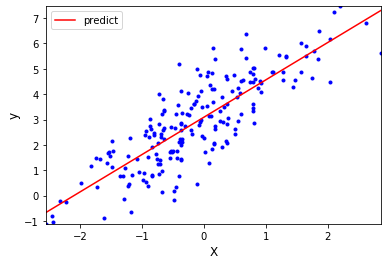

In [185]:
graph(X,y,theta_hat)

In [0]:
#MSE 그래디언트 벡터
def gradient_MSE(X,y,theta):
  return 2/len(X)*(X.T.dot(X.dot(theta)-y))

#배치 경사 하강
def batch_gradient_descent(X,y,eta,iteration): 
  #eta: 학습률, iteration: 반복 횟수
  theta = np.random.randn(np.shape(X)[1],1)
  for i in range(iteration):
    theta = theta - eta*gradient_MSE(X,y,theta)
  return theta

In [53]:
batch_gradient_descent(X_bias,y,0.1,100)

array([[2.94726173],
       [1.58333276]])

In [0]:
# 확률적 경사 하강
def stochastic_gradient_descent(X,y,eta,ls_func,iteration):
   #ls_func: 학습 스케줄 함수
   theta = np.random.randn(2,1)
   for i in range(iteration):
     random_index = np.random.randint(len(X))
     X_random_sample = X[random_index:random_index+1]
     y_random_sample = y[random_index:random_index+1]
     eta = ls_func(i+1)
     theta = theta - eta*gradient_MSE(X_random_sample,y_random_sample,theta)
   return theta
   

In [123]:
# learning schedule 함수
def learning_schedule(aug):
  return 5/(50+aug)

#SGDRegressor invscaling learning schedule 함수
def invscaling(aug,eta0=0.01, power_t=0.25):
  return eta0/((aug)**power_t)

#SGDRegressor optimal learning schedule 함수
def optimal(aug,t0=1,alpha=0.1):
  z = t0 + aug
  return 1/(alpha*z)

stochastic_gradient_descent(X_bias,y,0.1,learning_schedule,1000)

array([[2.93171236],
       [1.5833836 ]])

In [111]:
stochastic_gradient_descent(X_bias,y,0.1,invscaling,1000)

array([[2.88061419],
       [1.64780522]])

In [124]:
stochastic_gradient_descent(X_bias,y,0.1,optimal,1000)

array([[2.91028077],
       [1.65797128]])

In [0]:
#미니배치 경사 하강
def Mbatch_gradient_descent(X,y,size=5,eta=0.1,iteration=100):
  # size = 배치 샘플 사이즈
  theta = np.random.randn(2,1)
  for i in range(iteration):
    random_index = np.random.randint(len(X))
    X_sample = X[random_index:random_index+size+1]
    y_sample = y[random_index:random_index+size+1]
    theta = theta - eta*gradient_MSE(X_sample,y_sample,theta)
  return theta

In [132]:
Mbatch_gradient_descent(X_bias,y,10,0.1,1000)

array([[2.73031834],
       [1.54046155]])

In [0]:
from sklearn.preprocessing import PolynomialFeatures

# 다중 회귀 데이터 전처리 함수
def poly_feature(data, degree, include_bias=False):
  # degree parameter : 데이터 차수 결정
  return PolynomialFeatures(degree=degree, include_bias=include_bias).fit_transform(data)


In [0]:
# 3차원 데이터 생성
X = 3*np.random.rand(50,1) - 2
y = 3*X**3 + 0.5*X**2 + 3*X + 3 + np.random.randn(50,1)/1.5

In [0]:
X_poly = poly_feature(X,3)
X_poly_bias = bias(X_poly)

In [0]:
# 배치 경사 하강으로 다중 회귀
theta_hat = batch_gradient_descent(X_poly_bias,y,0.1,1000)

In [359]:
theta_hat

array([[2.88846236],
       [3.06541925],
       [0.68998114],
       [3.02090545]])

In [0]:
# 10차 다중 회귀

# 여러가지 방법으로 데이터 스케일링 해보기

X_poly_10 = poly_feature(X,10)/100
y_10 = y/100
X_poly_bias_10 = bias(X_poly_10)

theta_hat = batch_gradient_descent(X_poly_bias_10,y_10,0.1,1000)

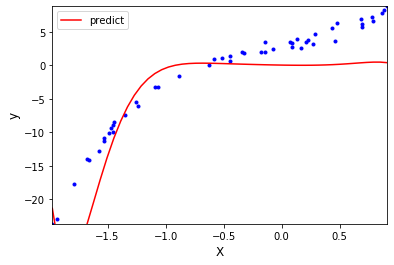

In [374]:
graph(X,y,theta_hat,poly=10)

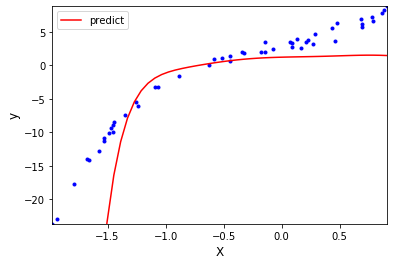

In [375]:
X_poly_10 = np.arctan(poly_feature(X,10))
y_10 = np.arctan(y)
X_poly_bias_10 = bias(X_poly_10)

theta_hat = batch_gradient_descent(X_poly_bias_10,y_10,0.1,1000)
graph(X,y,theta_hat,poly=10)

In [0]:
# 릿지 회귀 Ridge Regression

def Ridge_Regression(X,y,alpha=0.1,solver='Normal',iteration=1000):
  A = np.eye(np.shape(X)[1]);A[0][0]=0 # bias 제외
  if solver == 'Normal':
    theta_hat = np.linalg.inv(X.T.dot(X)+alpha*A).dot(X.T).dot(y)
   
    """ 
    숄레스키 분해를 이용한 릿지 회귀
    릿지 회귀는 어떤 행렬 A 가 대칭이고 양의 정부호 행렬일 경우 하삼각행렬 L의
    L L^T 로 분해될 수 있음을 이용하며 성능 면에서 우위를 점함
    """
    
  elif solver == 'cholesky':
    L = np.linalg.cholesky(X.T.dot(X)+ alpha*A)
    theta_hat = np.linalg.solve(L.dot(L.T),X.T.dot(y))
  return theta_hat
 



In [217]:
# 릿지 회귀 정규방정식
theta_hat = Ridge_Regression(X_poly_bias,y) 
print(theta_hat)

[[-0.02147842]
 [ 3.10545045]
 [ 2.06380446]]


In [0]:
#릿지 회귀 숄레스키 분해
theta_hat = Ridge_Regression(X_poly_bias,y,solver='cholesky')

#alpha = 1
theta_hat_1 = Ridge_Regression(X_poly_bias,y,alpha=1,solver='cholesky')

#alpha = 10
theta_hat_10 = Ridge_Regression(X_poly_bias,y,alpha=10,solver='cholesky')

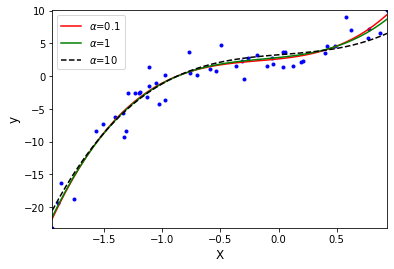

In [278]:
plt.plot(X,y,'b.')
X_new = np.linspace(min(X),max(X),len(X)).reshape(len(X),1)
X_new_poly = poly_feature(X_new, 3)
y_new = bias(X_new_poly).dot(theta_hat)
y_new_1 = bias(X_new_poly).dot(theta_hat_1)
y_new_10 = bias(X_new_poly).dot(theta_hat_10)
plt.plot(X_new,y_new,'r-',label=r'$\alpha$=0.1')
plt.plot(X_new,y_new_1,'g-',label=r'$\alpha$=1')
plt.plot(X_new,y_new_10,'k--',label=r'$\alpha$=10')
plt.xlabel('X',fontsize=12)
plt.ylabel('y',fontsize=12)
plt.legend(loc='upper left',fontsize=10)
plt.axis([min(X),max(X),min(y),max(y)])
plt.show()